# Step 2. Exploratory data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [18]:
train = pd.read_csv("../input/clean_train.csv")
test = pd.read_csv("../input/test.csv")
all_data = [train, test]

## Null values

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Strategy

Some values or categories are already well done: Sex, Pclass, SibSp, Parch. <br> <br>
However I would like to work more in some features:

* Name. The title names contains useful information such as which woman is married, who's a doctor, etc.
* Age. There are a lot of null values related to the age. It would be preferible to work on that.
* Embarked. There are also some null values in this category. Fortunately there aren't too many.
* Cabin. A a mess.
* Ticket. Also mess. I don't sure if I gonna dilete this one or not.

The only feature that I decided to drop is Passeger ID for obvious reasons. And ticket maybe.

## Numerical values

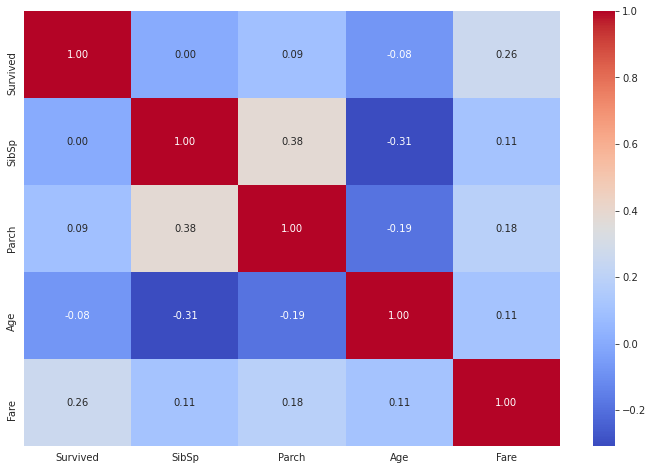

In [8]:
corr = train[["Survived","SibSp","Parch","Age","Fare"]].corr()
with sns.axes_style("white"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.heatmap(corr, annot=True, fmt = ".2f", cmap = "coolwarm")

## Sex

In [37]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


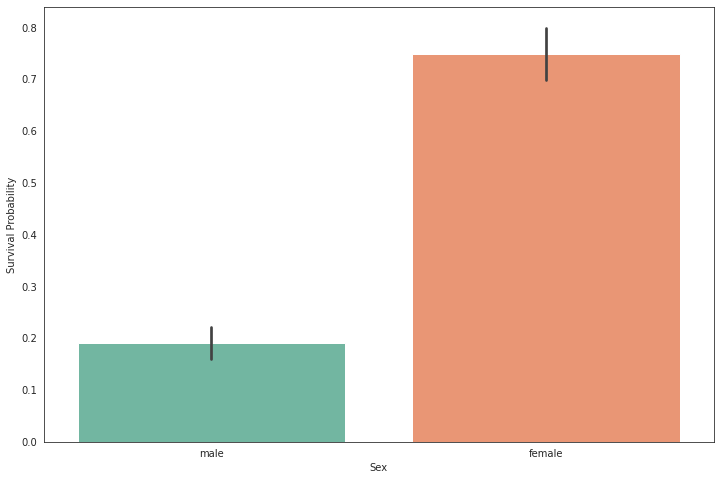

In [29]:
with sns.axes_style("white"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.barplot(x="Sex", y="Survived", data=train)
    g = g.set_ylabel("Survival Probability")

## Economic class: Pclass

In [23]:
train[["Pclass","Survived"]].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629108
2,0.472826
3,0.245868


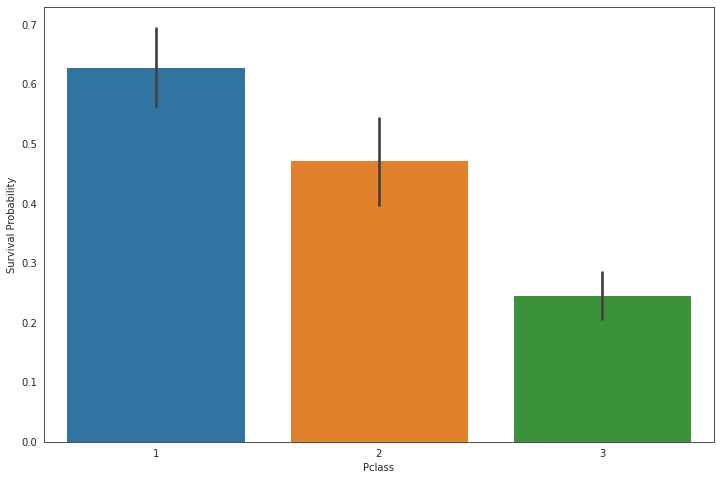

In [24]:
with sns.axes_style("white"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.barplot(x="Pclass", y="Survived", data=train)
    g = g.set_ylabel("Survival Probability")

## Siblings or spouses: SibSp

In [25]:
train[["SibSp","Survived"]].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.153846
4,0.166667
5,0.000000


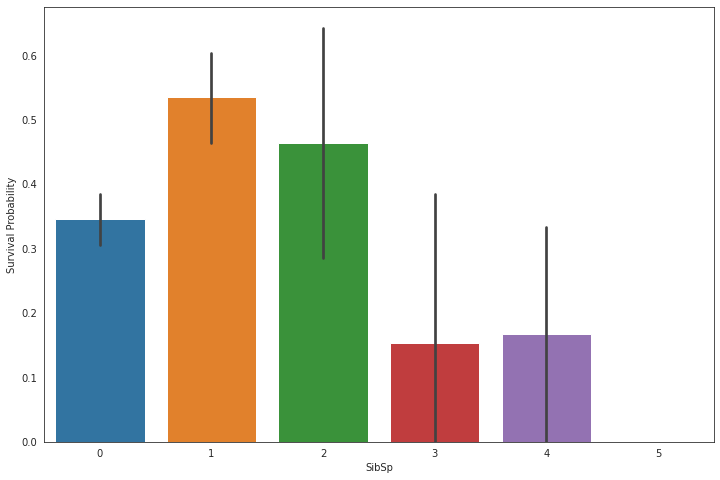

In [26]:
with sns.axes_style("white"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.barplot(x="SibSp", y="Survived", data=train)
    g = g.set_ylabel("Survival Probability")

## Parents or children: Parch

In [27]:
train[["Parch","Survived"]].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.542857
3,0.600000
4,0.000000
5,0.200000
6,0.000000


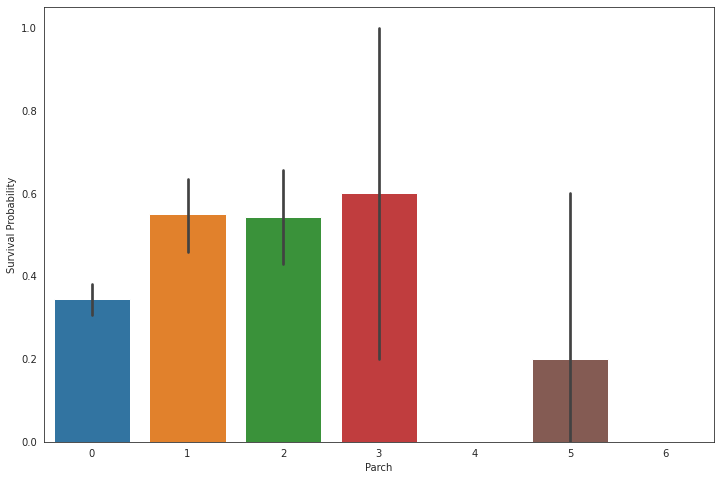

In [28]:
with sns.axes_style("white"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.barplot(x="Parch", y="Survived", data=train)
    g = g.set_ylabel("Survival Probability")